# TASK 1: Exploratory Data Analysis (EDA)

**Project:** Advanced Financial Fraud Detection

**Goal:** Understand the credit card dataset and find patterns useful for fraud detection modeling.

In [31]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Load dataset
df = pd.read_excel('../data/dataset.xlsx')

# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Shape: (1048575, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB
None

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
ne

In [33]:
# ✅ Check Target Variable
print("\nFraud Value Counts:")
print(df['isFraud'].value_counts())
print("\nFraud Percentage:")
print(df['isFraud'].value_counts(normalize=True) * 100)

# ✅ Transaction Types
print("\nTransaction Types:")
print(df['type'].value_counts())


Fraud Value Counts:
isFraud
0    1047433
1       1142
Name: count, dtype: int64

Fraud Percentage:
isFraud
0    99.89109
1     0.10891
Name: proportion, dtype: float64

Transaction Types:
type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


In [34]:
# ✅ Encode Transaction Type
df['type'] = df['type'].astype('category').cat.codes

# ✅ Feature: Hour of Day (Assuming 1 step = 1 hour)
df['hour'] = df['step'] % 24

# ✅ Feature: High Amount Flag
df['highAmount'] = df['amount'].apply(lambda x: 1 if x > 100000 else 0)

# ✅ Drop unneeded columns (like `isFlaggedFraud` if not used)
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

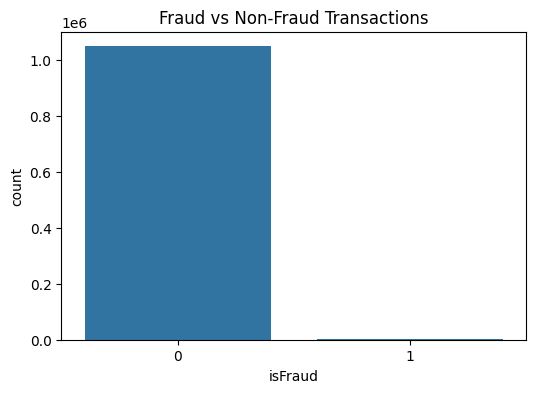

In [35]:
# ✅ Plot: Fraud vs Non-Fraud
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

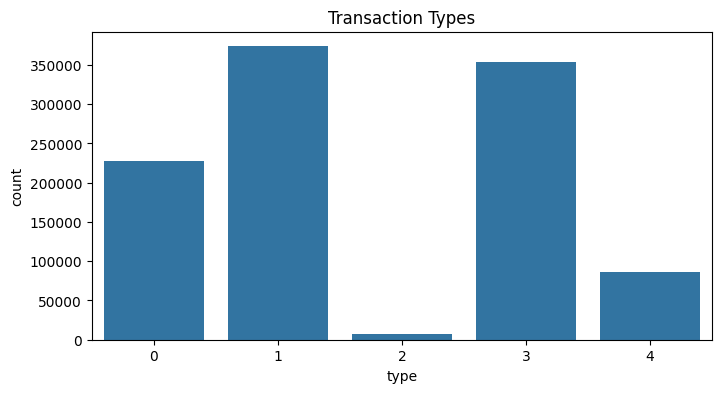

In [36]:
# ✅ Plot: Transaction Types
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type')
plt.title('Transaction Types')
plt.show()

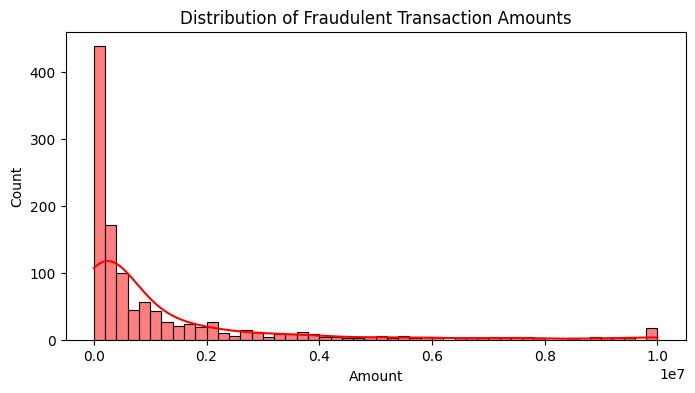

In [37]:

# ✅ Plot: Fraud Amounts Distribution
plt.figure(figsize=(8,4))
sns.histplot(df[df['isFraud'] == 1]['amount'], bins=50, color='red', kde=True)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.show()

In [38]:
# ✅ Save Preprocessed Data
df.to_csv('../data/paysim_cleaned.csv', index=False)
print("✅ Saved cleaned data to: ../data/paysim_cleaned.csv")

✅ Saved cleaned data to: ../data/paysim_cleaned.csv


## 📌 Summary
- Dataset Overview
     The dataset contains ~6 million simulated financial transactions.

     Each row represents a transaction with fields such as:

     step (hourly time step)

     type (transaction type)

     amount, nameOrig, nameDest (sender/receiver)

     isFraud (target variable)

- Preprocessing Steps
     Missing Values: No missing values were found.

     Data Types: Converted type column to numerical using categorical encoding.

     Feature Engineering:

     Created hour feature from step to represent time of transaction.

     Added highAmount binary flag for transactions over ₹100,000.

     Dropped: Removed isFlaggedFraud due to limited usefulness (very few flagged transactions).

- Visualizations
     Fraud Distribution: Data is highly imbalanced — only a small portion (~0.1%) are frauds.

     Transaction Type Frequency: Majority of transactions are CASH_OUT and TRANSFER.

     Amount Distributions: Fraudulent transactions tend to involve large amounts.

💾 Output
     Saved cleaned dataset as: paysim_cleaned.csv for modeling in Week 2.